In [1]:
import os

In [2]:
import tarfile

In [3]:
import urllib

In [4]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [5]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [6]:
!ls

1st.ipynb  datasets  images


In [ ]:
fetch_housing_data()

In [7]:
!ls

1st.ipynb  datasets  images


In [8]:
!ls datasets

housing


In [9]:
!ls datasets/housing/

housing.csv  housing.tgz


In [10]:
!du -h datasets/housing/*

1.4M	datasets/housing/housing.csv
404K	datasets/housing/housing.tgz


In [5]:
import pandas as pd

In [6]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, 'housing.csv')
    return pd.read_csv(csv_path)

In [7]:
housing = load_housing_data()

In [8]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
housing.shape

(20640, 10)

## info() method

* The **info()** method is useful to get a quick description of the data, in particular the total number of rows, each attribute’s type, and the number of nonnull values


In [10]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<br>

**Review from above info() method** 
* There are 20,640 instances in the dataset, which means that it is fairly small by Machine Learning standards, but it’s perfect to get started. 
* Notice that the total_bedrooms attribute has only 20,433 nonnull values, meaning that 207 districts are missing this feature. We will need to take care of this later.
* All attributes are numerical, except the ocean_proximity field. Its type is object, so it could hold any kind of Python object.
* since we loaded this data from a CSV file, you know that it (ocean_proximity) must be a text attribute.

* When we looked at the top five rows using the **head()** method, we probably noticed that the values in the ocean_proximity column were repetitive, which means that it is probably a **categorical attribute**. 
* We can find out what categories exist and how many districts belong to each category by using the **value_counts()** method:

## value_counts() method

In [11]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

## describe() method

In [12]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<br>

**Review from above describe() method** 
* The **count, mean, min, and max rows** are self-explanatory.
* Note that the null values are ignored (so, for example, the count of total_bedrooms is 20,433, not 20,640).
* The **std** row shows the standard deviation, which measures how dispersed the values are.
* The 25%, 50%, and 75% rows show the corresponding percentiles:
    * A percentile indicates the value below which a given percentage of observations in a group of observations fall.
    * For example, 25% of the districts have a housing_median_age lower than 18, while 50% are lower than 29 and 75% are lower than 37. These are often called the 25th percentile (or first quartile), the median, and the 75th percentile (or third quartile).
* 

## Histogram

* It's a quick way to get a feel of the type of data you are dealing with is to plot a histogram for each numerical attribute.
* A histogram shows the number of instances (on the vertical axis) that have a given value range (on the horizontal axis).
* We can either plot this one attribute at a time, or you can call the hist() method on the whole dataset (as shown in the following code example)

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

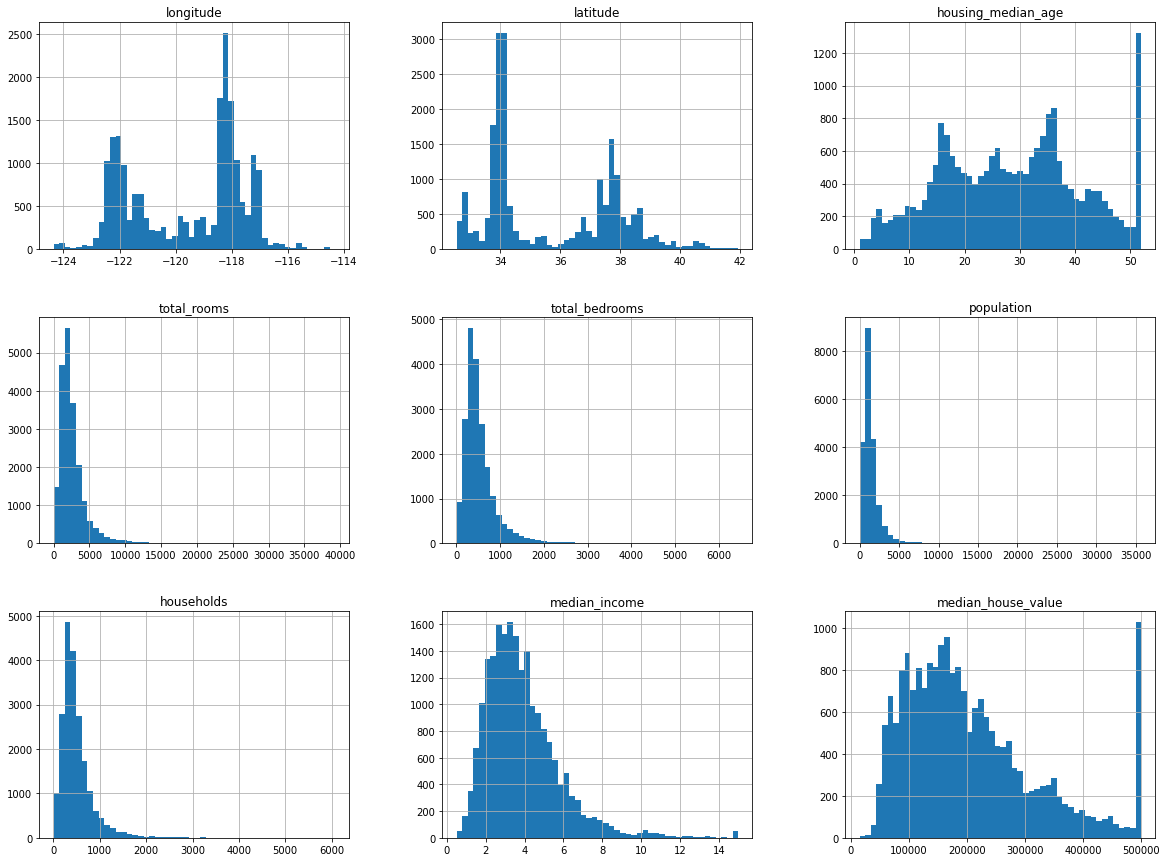

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))

<br>

**Review from above Histogram** 
1. First, the median income attribute does not look like it is expressed in US dollars (USD). After checking with the team that collected the data, you are told that the data has been scaled and capped at 15 (actually, 15.0001) for higher median incomes, and at 0.5 (actually, 0.4999) for lower median incomes. The numbers represent roughly tens of thousands of dollars (e.g., 3 actually means about $30,000). Working with preprocessed attributes is common in Machine Learning, and it is not necessarily a problem, but you should try to understand how the data was computed.

2. The housing median age and the median house value were also capped. The latter may be a serious problem since it is your target attribute (your labels). Your Machine Learning algorithms may learn that prices never go beyond that limit. You need to check with your client team (the team that will use your system’s output) to see if this is a problem or not. If they tell you that they need precise predictions even beyond $500,000, then you have two options: 

    * Collect proper labels for the districts whose labels were capped.
    * Remove those districts from the training set (and also from the test set, since your system should not be evaluated poorly if it predicts values beyond $500,000).


3. These attributes have very different scales. We will discuss this later in this chapter, when we explore feature scaling.

4. Finally, many histograms are tail-heavy: they extend much farther to the right of the median than to the left. This may make it a bit harder for some Machine Learning algorithms to detect patterns. We will try transforming these attributes later on to have more bell-shaped distributions.

# **WARNING**
**Wait! Before you look at the data any further, you need to create a test set, put it aside, and never look at it.**

## Create a Test Set

In [19]:
import numpy as np

In [9]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [35]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), len(test_set), len(housing))

16512 4128 20640


Well, this works, but it is not perfect: if you run the program again, it will generate a different test set! Over time, you (or your Machine Learning algorithms) will get to see the whole dataset, which is what you want to avoid.
* One solution is to save the test set on the first run and then load it in subsequent runs. 
* Another option is to set the random number generator’s seed (e.g., with np.random.seed(42))14 before calling np.random.permutation() so that it always generates the same shuffled indices.

**But both these solutions will break the next time you fetch an updated dataset.**

To have a stable train/test split even after updating the dataset, a common solution is to use each instance’s identifier to decide whether or not it should go in the test set (assuming instances have a unique and immutable identifier).

For example, you could compute a hash of each instance’s identifier and put that instance in the test set if the hash is lower than or equal to 20% of the maximum hash value. This ensures that the test set will remain consistent across multiple runs, even if you refresh the dataset. The new test set will contain 20% of the new instances, but it will not contain any instance that was previously in the training set.

Here is a possible implementation:

In [21]:
from zlib import crc32

In [22]:
crc32??

Signature: crc32(data, value=0, /)
Docstring:
Compute a CRC-32 checksum of data.

  value
    Starting value of the checksum.

The returned checksum is an integer.
Type:      builtin_function_or_method


In [23]:
def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

Unfortunately, the housing dataset does not have an identifier column. The simplest solution is to use the row index as the ID:

In [94]:
housing_with_id = housing.reset_index() # adds an `index` column

In [95]:
housing_with_id.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [96]:
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [97]:
len(train_set), len(test_set), len(housing_with_id)

(16512, 4128, 20640)

If we use the row index as a unique identifier, you need to make sure that new data gets appended to the end of the dataset and that no row ever gets deleted. If this is not possible, then you can try to use the most stable features to build a unique identifier. For example, a district’s latitude and longitude are guaranteed to be stable for a few million years, so we could combine them into an ID like so: 

In [98]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
housing_with_id.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-122192.12
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-122182.14
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-122202.15
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-122212.15
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-122212.15


In [99]:
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [100]:
len(train_set), len(test_set), len(housing_with_id)

(16322, 4318, 20640)

## split_train_test()

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [16]:
len(train_set), len(test_set), len(housing)

(16512, 4128, 20640)

### **Problem of pure random sampling**

So far we have considered purely random sampling methods. This is generally fine if your dataset is large enough (especially relative to the number of attributes), but if it is not, you run the risk of introducing a significant **sampling bias**.

**Example of Sampling** 

When a survey company decides to call 1,000 people to ask them a few questions, they don’t just pick 1,000 people randomly in a phone book. They try to ensure that these 1,000 people are representative of the whole population. For example, the US population is 51.3% females and 48.7% males, so a well-conducted survey in the US would try to maintain this ratio in the sample: 513 female and 487 male. This is called **stratified sampling**: the population is divided into homogeneous subgroups called strata, and the right number of instances are sampled from each stratum to guarantee that the test set is representative of the overall population. If the people running the survey used purely random sampling, there would be about a 12% chance of sampling a skewed test set that was either less than 49% female or more than 54% female. Either way, the survey results would be significantly biased.

## Make test set based on some attribute like stratified sampling
### Use of pd.cut()

* Suppose we chatted with experts who told us that the **median income is a very important attribute to predict median housing prices**. 

* We may want to ensure that the test set is representative of the various categories of incomes in the whole dataset. Since the **median income is a continuous numerical attribute**, we first need to **create an income category attribute**. 

* Let’s **look** at the **median income histogram more closely**: 
    * Most median income values are clustered around 1.5 to 6 (i.e., $15,000–$60,000), but some median incomes go far beyond 6. 
    *  It is important to have a sufficient number of instances in our dataset for each stratum, or else the estimate of a stratum’s importance may be biased. 
    * This means that we should not have too many strata, and each stratum should be large enough. 
    
    
* The following code uses the **pd.cut()** function to create an income category attribute with five categories (labeled from 1 to 5): category 1 ranges from 0 to 1.5 (i.e., less than $15,000), category 2 from 1.5 to 3, and so on

In [17]:
pd.cut??

Signature:
pd.cut(
    x,
    bins,
    right:bool=True,
    labels=None,
    retbins:bool=False,
    precision:int=3,
    include_lowest:bool=False,
    duplicates:str='raise',
    ordered:bool=True,
)
Source:   
def cut(
    x,
    bins,
    right: bool = True,
    labels=None,
    retbins: bool = False,
    precision: int = 3,
    include_lowest: bool = False,
    duplicates: str = "raise",
    ordered: bool = True,
):
    """
    Bin values into discrete intervals.

    Use `cut` when you need to segment and sort data values into bins. This
    function is also useful for going from a continuous variable to a
    categorical variable. For example, `cut` could convert ages to groups of
    age ranges. Supports binning into an equal number of bins, or a
    pre-specified array of bins.

    Parameters
    ----------
    x : array-like
        The input array to be binned. Must be 1-dimensional.
    bins : int, sequence of scalars, or IntervalIndex
        The criteria to bin by.

   

In [20]:
housing['income_cat'] = pd.cut(housing['median_income'], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])

In [21]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


<AxesSubplot:>

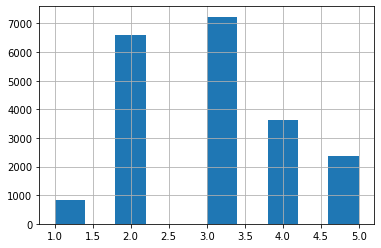

In [22]:
housing['income_cat'].hist()

<br>

**Now we are ready to do stratified sampling based on the income category. For this you can use Scikit-Learn’s StratifiedShuffleSplit class:**

In [23]:
from sklearn.model_selection import StratifiedShuffleSplit

In [32]:
StratifiedShuffleSplit??

Init signature:
StratifiedShuffleSplit(
    n_splits=10,
    *,
    test_size=None,
    train_size=None,
    random_state=None,
)
Source:        
class StratifiedShuffleSplit(BaseShuffleSplit):
    """Stratified ShuffleSplit cross-validator

    Provides train/test indices to split data in train/test sets.

    This cross-validation object is a merge of StratifiedKFold and
    ShuffleSplit, which returns stratified randomized folds. The folds
    are made by preserving the percentage of samples for each class.

    Note: like the ShuffleSplit strategy, stratified random splits
    do not guarantee that all folds will be different, although this is
    still very likely for sizeable datasets.

    Read more in the :ref:`User Guide <cross_validation>`.

    Parameters
    ----------
    n_splits : int, default=10
        Number of re-shuffling & splitting iterations.

    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
 

In [24]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    print(len(strat_train_set), len(strat_test_set), len(housing))


16512 4128 20640


Let’s see if this worked as expected. We can start by looking at the income category proportions in the test set:

In [ ]:
strat_train_set['income_cat'].value_counts()/len(strat_train_set)

In [25]:
strat_test_set['income_cat'].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [26]:
housing['income_cat'].value_counts()/len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

<br>

As we can see, the test set generated using stratified sampling has income category proportions almost identical to those in the full dataset.

Now you should remove the income_cat attribute so the data is back to its original state:

In [27]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

### Discover and Visualize the Data to Gain Insights

* First, make sure you have put the test set aside and you are only exploring the training set. Also, if the training set is very large, you may want to sample an exploration set, to make manipulations easy and fast.
* In our case, the set is quite small, so you can just work directly on the full set. Let’s create a copy so that you can play with it without harming the training set:

In [28]:
housing = strat_train_set.copy()

### Visualizing Geographical Data

Since there is geographical information (latitude and longitude), it is a good idea to create a scatterplot of all districts to visualize the data 

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

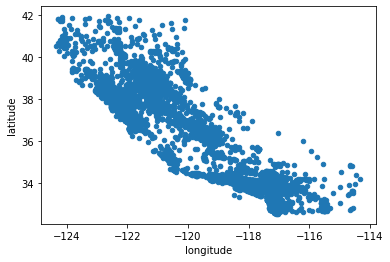

In [29]:
housing.plot(kind='scatter', x='longitude', y='latitude')

**Notes from above cell**

This looks like California all right, but other than that it is hard to see any particular pattern.

Setting the alpha option to 0.1 makes it much easier to visualize the places where there is a high density of data points

In [30]:
housing.plot??

Signature:      housing.plot(*args, **kwargs)
Type:           PlotAccessor
String form:    <pandas.plotting._core.PlotAccessor object at 0x7f9adca0ccc0>
File:           ~/Documents/venv/tlfMaths3.6/lib/python3.6/site-packages/pandas/plotting/_core.py
Source:        
class PlotAccessor(PandasObject):
    """
    Make plots of Series or DataFrame.

    Uses the backend specified by the
    option ``plotting.backend``. By default, matplotlib is used.

    Parameters
    ----------
    data : Series or DataFrame
        The object for which the method is called.
    x : label or position, default None
        Only used if data is a DataFrame.
    y : label, position or list of label, positions, default None
        Allows plotting of one column versus another. Only used if data is a
        DataFrame.
    kind : str
        The kind of plot to produce:

        - 'line' : line plot (default)
        - 'bar' : vertical bar plot
        - 'barh' : horizontal bar plot
        - 'hist' : histo

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

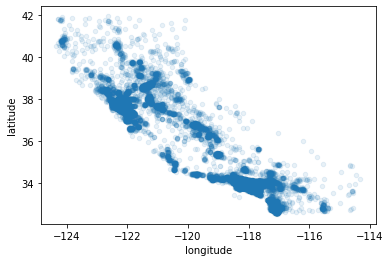

In [31]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

**Notes from above**

Now that’s much better: you can clearly see the high-density areas, namely the Bay Area and around Los Angeles and San Diego, plus a long line of fairly high density in the Central Valley, in particular around Sacramento and Fresno.

Our brains are very good at spotting patterns in pictures, but you may need to play around with visualization parameters to make the patterns stand out.

-------------------------------------------------------------

Now let’s look at the housing prices (below Figure). The radius of each circle represents the district’s population (option s), and the color represents the price (option c). We will use a predefined color map (option cmap) called jet, which ranges from blue (low values) to red (high prices)

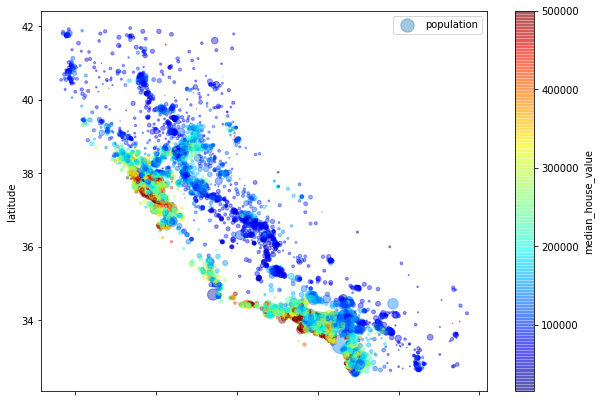

In [32]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

**Notes from above**

This image tells you that the housing prices are very much related to the location (e.g., close to the ocean) and to the population density, as you probably knew already. A clustering algorithm should be useful for detecting the main cluster and for adding new features that measure the proximity to the cluster centers. The ocean proximity attribute may be useful as well, although in Northern California the housing prices in coastal districts are not too high, so it is not a simple rule.

## Looking for Correlations

Since the dataset is not too large, we can easily compute the standard correlation coefficient (also called Pearson’s r) between every pair of attributes using the **corr() method**

In [33]:
corr_matrix = housing.corr()

Now let’s look at how much each attribute correlates with the median house value:

In [34]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

<br>

**About Correlation**

* The correlation coefficient ranges from –1 to 1. 
* When it is close to 1, it means that there is a strong positive correlation; 
    * for example, the median house value tends to go up when the median income goes up. 
* When the coefficient is close to –1, it means that there is a strong negative correlation; 
    * you can see a small negative correlation between the latitude and the median house value (i.e., prices have a slight tendency to go down when you go north). 
* Finally, coefficients close to 0 mean that there is no linear correlation. Below Figure shows various plots along with the correlation coefficient between their horizontal and vertical axes.

![Correlation Image](images/correlation.png)

### WARNING in correlation

In above figure:
* The correlation coefficient only measures linear correlations (“if x goes up, then y generally goes up/down”). 
* It may completely miss out on nonlinear relationships (e.g., “if x is close to 0, then y generally goes up”). 
    * Note how all the plots of the bottom row have a correlation coefficient equal to 0, despite the fact that their axes are clearly not independent: these are examples of nonlinear relationships. 
    * Also, the second row shows examples where the correlation coefficient is equal to 1 or –1; notice that this has nothing to do with the slope. For example, your height in inches has a correlation coefficient of 1 with your height in feet or in nanometers.

### Another way of checking correlation

Another way to check for correlation between attributes is to use the pandas scatter_matrix() function, which plots every numerical attribute against every other numerical attribute. Since there are now 11 numerical attributes, you would get $11^2 = 121$ plots, which would not fit on a page—so let’s just focus on a few promising attributes that seem most correlated with the median housing value below figure:

In [35]:
from pandas.plotting import scatter_matrix

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

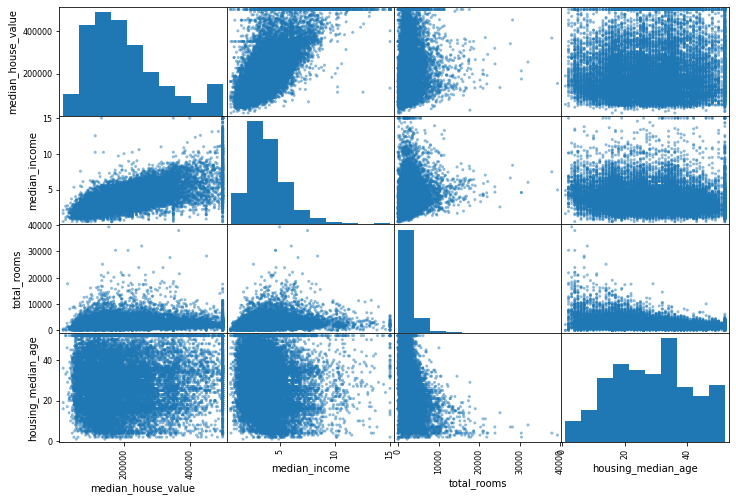

In [36]:
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize=(12, 8))

The main diagonal (top left to bottom right) would be full of straight lines if pandas plotted each variable against itself, which would not be very useful. So instead pandas displays a histogram of each attribute (other options are available; see the pandas documentation for more details).

The most promising attribute to predict the median house value is the median income, so let’s zoom in on their correlation scatterplot 

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

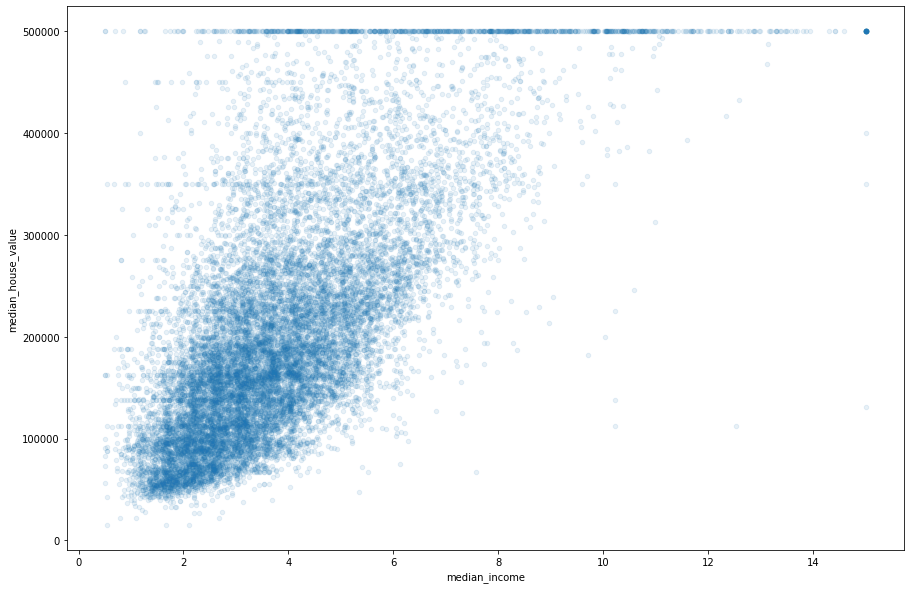

In [37]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1, figsize=(15,10))

This plot reveals a few things. 
* First, the correlation is indeed very strong; you can clearly see the upward trend, and the points are not too dispersed. 
* Second, the price cap that we noticed earlier is clearly visible as a horizontal line at \$500,000. 
* But this plot reveals other less obvious straight lines: a horizontal line around \\$450,000, another around \\$350,000, perhaps one around \$280,000, and a few more below that. **You may want to try removing the corresponding districts to prevent your algorithms from learning to reproduce these data quirks.**

### Experimenting with Attribute Combinations

* In the previous section we noticed that some attributes have a tail-heavy distribution, so we may want to transform them (e.g., by computing their logarithm). Of course, your mileage will vary considerably with each project, but the general ideas are similar.

* The total number of rooms in a district is not very useful if we don’t know how many households there are.
    * We really want is the number of rooms per household.
* Similarly, the total number of bedrooms by itself is not very useful.
    * We probably want to compare it to the number of rooms.
* And the population per household also seems like an interesting attribute combination to look at.

Let’s create these new attributes:

In [38]:
housing.keys()

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [39]:
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']
housing['population_per_household'] = housing['population'] / housing['households']

Now let's look at correlation matrix again:

In [40]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

Hey, not bad! 
* The new bedrooms_per_room attribute is much more correlated with the median house value than the total number of rooms or bedrooms. Apparently houses with a lower bedroom/room ratio tend to be more expensive. 
* The number of rooms per household is also more informative than the total number of rooms in a district—obviously the larger the houses, the more expensive they are.

```This round of exploration does not have to be absolutely thorough; the point is to start off on the right foot and quickly gain insights that will help you get a first reasonably good prototype. But this is an iterative process: once you get a prototype up and running, you can analyze its output to gain more insights and come back to this exploration step.```

## Prepare the Data for Machine Learning Algorithms

It’s time to prepare the data for your Machine Learning algorithms. Instead of doing this manually, you should write functions for this purpose, for several good reasons:
* This will allow us to reproduce these transformations easily on any dataset (e.g., the next time we get a fresh dataset).
* We will gradually build a library of transformation functions that we can reuse in future projects.
* We can use these functions in our live system to transform the new data before feeding it to our algorithms.
* This will make it possible for us to easily try various transformations and see which combination of transformations works best.

But first let’s *revert to a clean training set* (by copying strat_train_set once again). Let’s also separate the predictors and the labels, since we don’t necessarily want to apply the same transformations to the predictors and the target values (note that drop() creates a copy of the data and does not affect strat_train_set):

In [41]:
strat_train_set.keys()

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [42]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [43]:
housing.keys()

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [44]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN


### **Data Cleaning**

Most Machine Learning algorithms cannot work with missing features, so let's create a few functions to take care of them.

We saw earlier that the `total_bedrooms` attribute has some missing values, so let's fix this. We have three options to do that:
1. Get rid of the corresponding districts.
2. Ger rid of the whole attribute.
3. Set the values to some value (zero, the mean, the median, etc).

You can accomplish these easily using DataFrame’s dropna(), drop(), and fillna() methods:

```housing.dropna(subset=["total_bedrooms"])    # option 1
housing.drop("total_bedrooms", axis=1)       # option 2
median = housing["total_bedrooms"].median()  # option 3
housing["total_bedrooms"].fillna(median, inplace=True)```

If we choose option 3, we should compute the median value on the training set and use it to fill the missing values in the training set. Don’t forget to save the median value that you have computed. You will need it later to replace missing values in the test set when you want to evaluate your system, and also once the system goes live to replace missing values in new data.

**Scikit-Learn** provides a handy class to take care of missing values: `SimpleImputer`. Here is how to use it. 
* First, you need to create a SimpleImputer instance, specifying that you want to replace each attribute’s missing values with the median of that attribute:

In [45]:
from sklearn.impute import SimpleImputer

In [33]:
SimpleImputer??

Init signature:
SimpleImputer(
    *,
    missing_values=nan,
    strategy='mean',
    fill_value=None,
    verbose=0,
    copy=True,
    add_indicator=False,
)
Source:        
class SimpleImputer(_BaseImputer):
    """Imputation transformer for completing missing values.

    Read more in the :ref:`User Guide <impute>`.

    .. versionadded:: 0.20
       `SimpleImputer` replaces the previous `sklearn.preprocessing.Imputer`
       estimator which is now removed.

    Parameters
    ----------
    missing_values : number, string, np.nan (default) or None
        The placeholder for the missing values. All occurrences of
        `missing_values` will be imputed. For pandas' dataframes with
        nullable integer dtypes with missing values, `missing_values`
        should be set to `np.nan`, since `pd.NA` will be converted to `np.nan`.

    strategy : string, default='mean'
        The imputation strategy.

        - If "mean", then replace missing values using the mean along
          

In [34]:
imputer = SimpleImputer(strategy="median")

Since the median can only be computed on numerical attributes, you need to create a copy of the data without the text attribute ocean_proximity:

In [57]:
housing_num = housing.drop("ocean_proximity", axis=1)

Now you can fit the imputer instance to the training data using the fit() method:

In [36]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

The imputer has simply computed the median of each attribute and stored the result in its `statistics_` instance variable. Only the `total_bedrooms` attribute had missing values, but we **cannot be sure that there won’t be any missing values in new data after the system goes live**, so it is `safer to apply the imputer to all the numerical attributes`:

In [37]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [38]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

Now you can use this “**trained**” imputer to transform the training set by replacing missing values with the learned medians:

In [39]:
X = imputer.transform(housing_num)

In [40]:
X

array([[-121.89  ,   37.29  ,   38.    , ...,  710.    ,  339.    ,
           2.7042],
       [-121.93  ,   37.05  ,   14.    , ...,  306.    ,  113.    ,
           6.4214],
       [-117.2   ,   32.77  ,   31.    , ...,  936.    ,  462.    ,
           2.8621],
       ...,
       [-116.4   ,   34.09  ,    9.    , ..., 2098.    ,  765.    ,
           3.2723],
       [-118.01  ,   33.82  ,   31.    , ..., 1356.    ,  356.    ,
           4.0625],
       [-122.45  ,   37.77  ,   52.    , ..., 1269.    ,  639.    ,
           3.575 ]])

The result is a plain NumPy array containing the transformed features. If you want to put it back into a pandas DataFrame, it’s si

In [41]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

In [42]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


### Handling Text and Categorical Attributes

So far we have only dealt with numerical attributes, but now let’s look at text attributes. 
In this dataset, there is just one: the `ocean_proximity` attribute. Let’s look at its value for the first 10 instances:

In [47]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


* It’s not arbitrary text: there are a limited number of possible values, each of which represents a category. So this attribute is a categorical attribute.
* Most Machine Learning algorithms prefer to work with numbers, so let’s convert these categories from text to numbers. 

For this, we can use Scikit-Learn’s `OrdinalEncoder` class:

In [48]:
from sklearn.preprocessing import OrdinalEncoder

In [56]:
OrdinalEncoder??

Init signature: OrdinalEncoder(*, categories='auto', dtype=<class 'numpy.float64'>)
Source:        
class OrdinalEncoder(_BaseEncoder):
    """
    Encode categorical features as an integer array.

    The input to this transformer should be an array-like of integers or
    strings, denoting the values taken on by categorical (discrete) features.
    The features are converted to ordinal integers. This results in
    a single column of integers (0 to n_categories - 1) per feature.

    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.

    .. versionadded:: 0.20

    Parameters
    ----------
    categories : 'auto' or a list of array-like, default='auto'
        Categories (unique values) per feature:

        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories should not mix strings and numeric
          values, and should be sor

In [49]:
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [50]:
housing_cat['ocean_proximity'].value_counts()

<1H OCEAN     7276
INLAND        5263
NEAR OCEAN    2124
NEAR BAY      1847
ISLAND           2
Name: ocean_proximity, dtype: int64

**You can get the list of categories using the categories_ instance variable. It is a list containing a 1D array of categories for each categorical attribute (in this case, a list containing a single array since there is just one categorical attribute):**

In [51]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

**Issues with OrdinalEncoder**

> One issue with this representation is that ML algorithms will assume that two nearby values are more similar than two distant values. This may be fine in some cases (e.g., for ordered categories such as “bad,” “average,” “good,” and “excellent”), but it is obviously not the case for the ocean_proximity column (for example, categories 0 and 4 are clearly more similar than categories 0 and 1). 

**Fix the issue**

> To fix this issue, a common solution is to create one binary attribute per category: one attribute equal to 1 when the category is “<1H OCEAN” (and 0 otherwise), another attribute equal to 1 when the category is “INLAND” (and 0 otherwise), and so on. This is called **one-hot encoding**, because only one attribute will be equal to 1 (hot), while the others will be 0 (cold). The new attributes are sometimes called **dummy attributes**. 

**Scikit-Learn provides a `OneHotEncoder` class to convert categorical values into one-hot vectors:**

In [46]:
from sklearn.preprocessing import OneHotEncoder

In [53]:
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

Notice that the output is a **SciPy sparse matrix**, instead of a NumPy array. This is very useful when you have categorical attributes with thousands of categories. After one-hot encoding, we get a matrix with thousands of columns, and the matrix is full of 0s except for a single 1 per row. Using up tons of memory mostly to store zeros would be very wasteful, so instead a sparse matrix only stores the location of the nonzero elements. We can use it mostly like a normal 2D array, but if we really want to convert it to a (dense) NumPy array, just call the `toarray()` method:

In [62]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [63]:
housing_cat_1hot.shape

(16512, 5)

Once again, you can get the list of categories using the encoder’s `categories_` instance variable:

In [64]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### **NOTE**
> If a categorical attribute has a large number of possible categories (e.g., country code, profession, species), then one-hot encoding will result in a large number of input features. This may **_slow down training and degrade performance_**. If this happens, you may want to **_replace the categorical input with useful numerical features related to the categories_**: <br>
    - For example, we could replace the `ocean_proximity` feature with the distance to the ocean (similarly, a country code could be replaced with the country’s population and GDP per capita). <br>
    - Alternatively, we could replace each category with a learnable, low-dimensional vector called an embedding. Each category’s representation would be learned during training. This is an example of representation learning (see Chapters 13 and 17 for more details).

### Custom Transformers

Although Scikit-Learn provides many useful transformers, then why do we need custom transformers? It is because: 
* We will need to write our own for tasks such as custom cleanup operations or combining specific attributes. 
* We will want our transformer to work seamlessly with Scikit-Learn functionalities (such as pipelines), and since Scikit-Learn relies on duck typing (not inheritance), all we need to do is create a class and implement three methods: fit() (returning self), transform(), and fit_transform().

We can get the last one for free by simply adding TransformerMixin as a base class. If we add BaseEstimator as a base class (and avoid \*args and \*\*kargs in our constructor), we will also get two extra methods (get_params() and set_params()) that will be useful for automatic hyperparameter tuning.

For example, here is a small transformer class that adds the combined attributes we discussed earlier:

In [49]:
import numpy as np

In [50]:
from sklearn.base import BaseEstimator, TransformerMixin

In [51]:
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y=None):
        return self # nothing else to do
    
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        return np.c_[X, rooms_per_household, population_per_household]
    

In [52]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [53]:
type(housing_extra_attribs)

numpy.ndarray

In [54]:
housing_extra_attribs.shape

(16512, 11)

In this example the transformer has one hyperparameter, `add_bedrooms_per_room`, set to `True` by default (it is often helpful to provide sensible defaults). This hyperparameter will allow you to easily find out whether adding this attribute helps the Machine Learning algorithms or not. More generally, we can add a hyperparameter to gate any data preparation step that we are not 100% sure about. The more we automate these data preparation steps, the more combinations we can automatically try out, making it much more likely that we will find a great combination (and saving us a lot of time).

### Feature Scaling

In [55]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000
mean,-119.575834,35.639577,28.653101,2622.728319,534.973890,1419.790819,497.060380,3.875589
std,2.001860,2.138058,12.574726,2138.458419,412.699041,1115.686241,375.720845,1.904950
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566775
50%,-118.510000,34.260000,29.000000,2119.500000,433.000000,1164.000000,408.000000,3.540900
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.250000,602.000000,4.744475
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100


One of the **`most important transformations`** we need to apply to our data is **_feature scaling_**. With few exceptions, Machine Learning algorithms don’t perform well when the input numerical attributes have very different scales. 

This is the case for the housing data: the total number of rooms ranges from about 6 to 39,320, while the median incomes only range from 0 to 15. Note that scaling the target values is generally not required.

> There are two common ways to get all attributes to have the same scale: **_min-max scaling_** and **_standardization_**.

#### Mix-max scaling

Min-max scaling (many people call this normalization) is the simplest: values are shifted and rescaled so that they end up ranging from 0 to 1. 

> We do this by subtracting the min value and dividing by the max minus the min. Scikit-Learn provides a transformer called MinMaxScaler for this. It has a `feature_range` hyperparameter that lets you change the range if, for some reason, you don’t want 0–1.

#### Standardization

Standardization is different: first it subtracts the mean value (so standardized values always have a zero mean), and then it divides by the standard deviation so that the resulting distribution has unit variance. 

* Unlike min-max scaling, standardization does not bound values to a specific range, which may be a problem for some algorithms (e.g., neural networks often expect an input value ranging from 0 to 1). 
* However, standardization is much **`less affected by outliers`**. 
> For example, suppose a district had a median income equal to 100 (by mistake). Min-max scaling would then crush all the other values from 0–15 down to 0–0.15, whereas standardization would not be much affected. 

* Scikit-Learn provides a transformer called `StandardScaler` for standardization.

### WARNING

As with all the transformations, it is important to fit the scalers to the training data only, not to the full dataset (including the test set). Only then can we use them to transform the training set and the test set (and new data).

### Transformation Pipelines

As we can see, there are many data transformation steps that need to be executed in the right order. Fortunately, Scikit-Learn provides the Pipeline class to help with such sequences of transformations. Here is a small pipeline for the numerical attributes:

In [58]:
type(housing_num)

pandas.core.frame.DataFrame

In [59]:
housing_num.shape

(16512, 8)

In [60]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [61]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

In [62]:
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [63]:
type(housing_num_tr)

numpy.ndarray

In [64]:
housing_num_tr.shape

(16512, 11)

The Pipeline constructor takes a list of name/estimator pairs defining a sequence of steps. All but the last estimator must be transformers (i.e., they must have a fit_transform() method). The names can be anything you like (as long as they are unique and don’t contain double underscores, __); they will come in handy later for hyperparameter tuning.

When you call the pipeline’s `fit()` method, it calls `fit_transform()` sequentially on all transformers, passing the output of each call as the parameter to the next call until it reaches the final estimator, for which it calls the `fit()` method.

The pipeline exposes the same methods as the final estimator. In this example, the last estimator is a `StandardScaler`, which is a transformer, so the pipeline has a `transform()` method that applies all the transforms to the data in sequence (and of course also a `fit_transform()` method, which is the one we used).

So far, we have handled the `categorical columns` and the `numerical columns` separately. It would be more convenient to have a single transformer able to **`handle all columns`**, applying the appropriate transformations to each column. 

In version 0.20, Scikit-Learn introduced the **`ColumnTransformer`** for this purpose, and the good news is that it works great with pandas DataFrames. Let’s use it to apply all the transformations to the housing data:

In [65]:
from sklearn.compose import ColumnTransformer

In [66]:
ColumnTransformer??

Init signature:
ColumnTransformer(
    transformers,
    *,
    remainder='drop',
    sparse_threshold=0.3,
    n_jobs=None,
    transformer_weights=None,
    verbose=False,
)
Source:        
class ColumnTransformer(TransformerMixin, _BaseComposition):
    """Applies transformers to columns of an array or pandas DataFrame.

    This estimator allows different columns or column subsets of the input
    to be transformed separately and the features generated by each transformer
    will be concatenated to form a single feature space.
    This is useful for heterogeneous or columnar data, to combine several
    feature extraction mechanisms or transformations into a single transformer.

    Read more in the :ref:`User Guide <column_transformer>`.

    .. versionadded:: 0.20

    Parameters
    ----------
    transformers : list of tuples
        List of (name, transformer, columns) tuples specifying the
        transformer objects to be applied to subsets of the data.

        name : str


In [67]:
list(housing_num)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [68]:
housing.keys()

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [69]:
num_attributes = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attributes),
    ("cat", OneHotEncoder(), cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(housing)

In [70]:
type(housing_prepared)

numpy.ndarray

In [71]:
housing_prepared.shape

(16512, 16)

* First we import the `ColumnTransformer` class, next we get the list of numerical column names and the list of categorical column names, and then we construct a `ColumnTransformer`. The constructor requires a list of tuples, where each tuple contains a name, a transformer, and a list of names (or indices) of columns that the transformer should be applied to. 
* In this example, we specify that the `numerical columns` should be transformed using the `num_pipeline` that we defined earlier, and the `categorical columns` should be transformed using a `OneHotEncoder`. 
* Finally, we apply this `ColumnTransformer` to the housing data: it applies each transformer to the appropriate columns and concatenates the outputs along the second axis (the transformers must return the same number of rows).

Note that the `OneHotEncoder` returns a `sparse matrix`, while the `num_pipeline` returns a `dense matrix`. When there is such a mix of sparse and dense matrices, the `ColumnTransformer` estimates the `density of the final matrix` (i.e., the ratio of nonzero cells), and it returns a sparse matrix if the density is lower than a given threshold (by default, sparse_threshold=0.3). In this example, it returns a dense matrix. And that’s it! We have a preprocessing pipeline that takes the full housing data and applies the appropriate transformations to each column.

#### TIP

Instead of using a transformer, we can specify the string `"drop"` if we want the columns to be dropped, or we can specify `"passthrough"` if we want the columns to be left untouched. By default, the remaining columns (i.e., the ones that were not listed) will be dropped, but we can set the `remainder` hyperparameter to any transformer (or to "passthrough") if we want these columns to be handled differently.

**If we are using Scikit-Learn 0.19 or earlier**, 
we can use a third-party library such as `sklearn-pandas`, or we can roll out your own custom transformer to get the same functionality as the `ColumnTransformer`. Alternatively, we can use the `FeatureUnion` class, which can apply different transformers and concatenate their outputs. But we cannot specify different columns for each transformer; they all apply to the whole data. It is possible to work around this limitation using a custom transformer for column selection (see the Jupyter notebook for an example).

## Select and Train a Model

At last! we framed the problem, we got the data and explored it, we sampled a training set and a test set, and we wrote transformation pipelines to clean up and prepare your data for Machine Learning algorithms automatically. We are now ready to select and train a Machine Learning model.

### Training and Evaluating on the Training Set

The good news is that thanks to all these previous steps, things are now going to be much simpler than you might think. Let’s first train a `Linear Regression` model:

In [72]:
from sklearn.linear_model import LinearRegression

In [73]:
type(housing_prepared), type(housing_labels)

(numpy.ndarray, pandas.core.series.Series)

In [74]:
housing_labels.describe()

count     16512.000000
mean     206990.920724
std      115703.014830
min       14999.000000
25%      119800.000000
50%      179500.000000
75%      263900.000000
max      500001.000000
Name: median_house_value, dtype: float64

In [75]:
housing_prepared.shape, housing_labels.shape

((16512, 16), (16512,))

In [76]:
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

Done! You now have a working Linear Regression model. Let’s try it out on a few instances from the training set:

In [77]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN


In [78]:
some_data = housing.iloc[6860:6870]
some_labels = housing_labels.iloc[6860:6870]
some_data_prepared = full_pipeline.fit_transform(some_data)

In [79]:
some_data['ocean_proximity'].value_counts()

NEAR BAY      4
<1H OCEAN     3
NEAR OCEAN    1
INLAND        1
ISLAND        1
Name: ocean_proximity, dtype: int64

In [80]:
some_data_prepared.shape, some_data.shape, housing.shape, type(some_data_prepared), type(some_data), type(housing)

((10, 16),
 (10, 9),
 (16512, 9),
 numpy.ndarray,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame)

In [81]:
print("predictions: ", lin_reg.predict(some_data_prepared))

predictions:  [274413.90342048 249794.74294452 103619.81834433 292230.93255579
 252325.71440435 380663.13944918 194877.07260038 199222.28370116
  88873.1258277  229656.67114483]


In [82]:
print("labels: ", list(some_labels))

labels:  [287500.0, 281300.0, 69800.0, 80600.0, 161400.0, 500001.0, 140300.0, 178800.0, 147400.0, 188000.0]


It works, although the predictions are not exactly accurate (e.g., the first prediction is off by close to 40%!). Let’s measure this regression model’s `RMSE` on the whole training set using Scikit-Learn’s `mean_squared_error()` function:

In [83]:
from sklearn.metrics import mean_squared_error

In [84]:
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

68628.19819848922


**Reviews from above error result**
* This is better than nothing, but clearly not a great score: most districts’ `median_housing_values` range between \\$120,000 and \\$265,000, so a typical prediction error of \\$68,628 is not very satisfying. This is an **`example of a model underfitting the training data`**. 
* When this happens it can mean that the **`features do not provide enough information to make good predictions`, or that `the model is not powerful enough`**. 
* As we saw in the previous chapter, **the main ways to fix underfitting** are to **select a more powerful model**, to **feed the training algorithm with better features**, or to **reduce the constraints on the model**. 
* **This model is not regularized, which rules out the last option**. 
* **We could try to add more features (e.g., the log of the population)**, **but first let’s try a more complex model to see how it does**.

Let’s train a **`DecisionTreeRegressor`**. **This is a powerful model, capable of finding complex nonlinear relationships in the data** (Decision Trees are presented in more detail in Chapter 6). The code should look familiar by now:

In [85]:
from sklearn.tree import DecisionTreeRegressor

In [86]:
DecisionTreeRegressor??

Init signature:
DecisionTreeRegressor(
    *,
    criterion='mse',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    presort='deprecated',
    ccp_alpha=0.0,
)
Source:        
class DecisionTreeRegressor(RegressorMixin, BaseDecisionTree):
    """A decision tree regressor.

    Read more in the :ref:`User Guide <tree>`.

    Parameters
    ----------
    criterion : {"mse", "friedman_mse", "mae"}, default="mse"
        The function to measure the quality of a split. Supported criteria
        are "mse" for the mean squared error, which is equal to variance
        reduction as feature selection criterion and minimizes the L2 loss
        using the mean of each terminal node, "friedman_mse", which uses mean
        squared error with Friedman's improvement score for potential splits

In [87]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

Now that the model is trained, let’s evaluate it on the training set:

In [88]:
housing_predictions = tree_reg.predict(housing_prepared)

In [89]:
tree_mse = mean_squared_error(housing_labels, housing_predictions)

In [90]:
tree_rmse = np.sqrt(tree_mse)

In [91]:
tree_rmse

0.0

**Reviews from above result**

Wait, what!? No error at all? Could this model really be absolutely perfect? 
* Of course, it is much more likely that **the model has badly overfit the data**. 
* **How can we be sure? As we saw earlier, we don’t want to touch the test set until we are ready to launch a model we are confident about, so we need to use part of the training set for training and part of it for model validation**.

#### Better Evaluation Using Cross-Validation

One way to *evaluate the Decision Tree model* would be to use the `train_test_split()` function to split the training set into a smaller training set and a validation set, then train your models against the smaller training set and evaluate them against the validation set. It’s a bit of work, but nothing too difficult, and it would work fairly well.

**A great alternative is to use Scikit-Learn’s `K-fold cross-validation` feature.**

The following code randomly splits the training set into 10 distinct subsets called folds, then it trains and evaluates the Decision Tree model 10 times, picking a different fold for evaluation every time and training on the other 9 folds. The result is an array containing the 10 evaluation scores:

In [92]:
from sklearn.model_selection import cross_val_score

In [93]:
cross_val_score??

Signature:
cross_val_score(
    estimator,
    X,
    y=None,
    *,
    groups=None,
    scoring=None,
    cv=None,
    n_jobs=None,
    verbose=0,
    fit_params=None,
    pre_dispatch='2*n_jobs',
    error_score=nan,
)
Source:   
@_deprecate_positional_args
def cross_val_score(estimator, X, y=None, *, groups=None, scoring=None,
                    cv=None, n_jobs=None, verbose=0, fit_params=None,
                    pre_dispatch='2*n_jobs', error_score=np.nan):
    """Evaluate a score by cross-validation

    Read more in the :ref:`User Guide <cross_validation>`.

    Parameters
    ----------
    estimator : estimator object implementing 'fit'
        The object to use to fit the data.

    X : array-like of shape (n_samples, n_features)
        The data to fit. Can be for example a list, or an array.

    y : array-like of shape (n_samples,) or (n_samples, n_outputs), \
            default=None
        The target variable to try to predict in the case of
        supervised learnin

In [94]:
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)

In [95]:
scores

array([-4.70284532e+09, -4.46962814e+09, -4.81149676e+09, -4.83395308e+09,
       -4.90230934e+09, -5.72987126e+09, -5.03391562e+09, -5.17198258e+09,
       -5.97522973e+09, -4.87788439e+09])

In [96]:
tree_rmse_scores = np.sqrt(-scores)

In [97]:
tree_rmse_scores

array([68577.29446676, 66855.27759767, 69364.95337553, 69526.63578359,
       70016.49332935, 75695.91307096, 70950.09246732, 71916.49725559,
       77299.61013247, 69841.85268066])

**`WARNING`**

Scikit-Learn’s cross-validation features expect a utility function (greater is better) rather than a cost function (lower is better), so the scoring function is actually the opposite of the MSE (i.e., a negative value), which is why the preceding code computes -scores before calculating the square root.

Let’s look at the results:

In [98]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard Deviation:", scores.std())

In [99]:
display_scores(tree_rmse_scores)

Scores: [68577.29446676 66855.27759767 69364.95337553 69526.63578359
 70016.49332935 75695.91307096 70950.09246732 71916.49725559
 77299.61013247 69841.85268066]
Mean: 71004.4620159901
Standard Deviation: 3045.9800119605375


**Reviews from above result**

* Now the Decision Tree doesn’t look as good as it did earlier. 
* In fact, it seems to perform worse than the Linear Regression model! 
* **Notice that cross-validation allows you to get not only an estimate of the performance of your model, but also a measure of how precise this estimate is (i.e., its standard deviation)**. 
* The Decision Tree has a score of approximately 71,407, generally ±2,439. You would not have this information if you just used one validation set. But cross-validation comes at the cost of training the model several times, so it is not always possible. 

Let’s compute the same scores for the Linear Regression model just to be sure:

In [100]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
Standard Deviation: 2731.674001798348


> **That’s right: the Decision Tree model is overfitting so badly that it performs worse than the Linear Regression model.**

* Let’s try one last model now: the **`RandomForestRegressor`**. 
* *Random Forests work by training many Decision Trees on random subsets of the features, then averaging out their predictions*. 
* *Building a model on top of many other models is called Ensemble Learning*, and it is often a great way to push ML algorithms even further. We will skip most of the code since it is essentially the same as for the other models:

In [101]:
from sklearn.ensemble import RandomForestRegressor

In [102]:
RandomForestRegressor??

Init signature:
RandomForestRegressor(
    n_estimators=100,
    *,
    criterion='mse',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    ccp_alpha=0.0,
    max_samples=None,
)
Source:        
class RandomForestRegressor(ForestRegressor):
    """
    A random forest regressor.

    A random forest is a meta estimator that fits a number of classifying
    decision trees on various sub-samples of the dataset and uses averaging
    to improve the predictive accuracy and control over-fitting.
    The sub-sample size is controlled with the `max_samples` parameter if
    `bootstrap=True` (default), otherwise the whole dataset is used to build
    each tree.

    Read more in the :ref:`User Guide <forest>`.

   

In [103]:
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [104]:
housing_predictions = forest_reg.predict(housing_prepared)

In [105]:
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)

In [106]:
forest_mse, forest_rmse

(346481584.59905034, 18614.01581064791)

In [107]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [49299.88493938 47739.56898667 50080.78353651 52303.60378813
 49656.57860568 53540.12576774 48483.61364793 48172.2510424
 53053.56360982 50373.75994998]
Mean: 50270.37338742325
Standard Deviation: 1947.7237462228898


**Reviews from above result**

* Wow, this is much better: Random Forests look very promising. 
* **However, note that the score on the training set is still much lower than on the validation sets, meaning that the model is still overfitting the training set**.
* **`Possible solutions for overfitting are to simplify the model, constrain it (i.e., regularize it), or get a lot more training data. Before you dive much deeper into Random Forests, however, you should try out many other models from various categories of Machine Learning algorithms (e.g., several Support Vector Machines with different kernels, and possibly a neural network), without spending too much time tweaking the hyperparameters. The goal is to shortlist a few (two to five) promising models.`**

## TIP

> You should save every model you experiment with so that you can come back easily to any model you want. Make sure you save both the hyperparameters and the trained parameters, as well as the cross-validation scores and perhaps the actual predictions as well. This will allow you to easily compare scores across model types, and compare the types of errors they make. You can easily save Scikit-Learn models by using Python’s pickle module or by using the joblib library, which is more efficient at serializing large NumPy arrays (you can install this library using pip):

`import joblib` </br>
`joblib.dump(my_model, "my_model.pkl")` </br>
`# add later...` </br>
`my_model_loaded = joblib.load("my_model.pkl")` </br>

## Fine-Tune Our Model

Let’s assume that you now have a shortlist of promising models. You now need to fine-tune them. Let’s look at a few ways you can do that.

### Grid Search

One option would be to fiddle with the hyperparameters manually, until you find a great combination of hyperparameter values. This would be very tedious work, and you may not have time to explore many combinations.

Instead, you should get Scikit-Learn’s `GridSearchCV` to search for you. All you need to do is tell it which hyperparameters you want it to experiment with and what values to try out, and it will use cross-validation to evaluate all the possible combinations of hyperparameter values. For example, the following code searches for the best combination of hyperparameter values for the `RandomForestRegressor`:

In [160]:
from sklearn.model_selection import GridSearchCV

In [161]:
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

In [162]:
forest_reg = RandomForestRegressor()

In [163]:
GridSearchCV??

Init signature:
GridSearchCV(
    estimator,
    param_grid,
    *,
    scoring=None,
    n_jobs=None,
    iid='deprecated',
    refit=True,
    cv=None,
    verbose=0,
    pre_dispatch='2*n_jobs',
    error_score=nan,
    return_train_score=False,
)
Source:        
class GridSearchCV(BaseSearchCV):
    """Exhaustive search over specified parameter values for an estimator.

    Important members are fit, predict.

    GridSearchCV implements a "fit" and a "score" method.
    It also implements "predict", "predict_proba", "decision_function",
    "transform" and "inverse_transform" if they are implemented in the
    estimator used.

    The parameters of the estimator used to apply these methods are optimized
    by cross-validated grid-search over a parameter grid.

    Read more in the :ref:`User Guide <grid_search>`.

    Parameters
    ----------
    estimator : estimator object.
        This is assumed to implement the scikit-learn estimator interface.
        Either estimator need

In [164]:
grid_search = GridSearchCV(forest_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

In [165]:
type(housing_prepared), type(housing_labels)

(numpy.ndarray, pandas.core.series.Series)

In [166]:
housing_prepared.shape, housing_labels.shape

((16512, 16), (16512,))

In [167]:
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

## TIP

> When you have *no idea* what value a *hyperparameter* should have, a simple approach is to try out *consecutive powers of 10* (or a smaller number if you want a more fine-grained search, as shown in this example with the *n_estimators hyperparameter*).

This `param_grid` tells Scikit-Learn to first evaluate all 3 × 4 = 12 combinations of `n_estimators` and `max_features` hyperparameter values specified in the first dict (don’t worry about what these hyperparameters mean for now; they will be explained in Chapter 7), then try all 2 × 3 = 6 combinations of hyperparameter values in the second dict, but this time with the bootstrap hyperparameter set to False instead of True (which is the default value for this hyperparameter).

The grid search will explore **12 + 6 = 18** combinations of `RandomForestRegressor` hyperparameter values, and it will **train each model 5 times (since we are using five-fold cross validation)**. </br>
In other words, all in all, **there will be 18 × 5 = 90 rounds of training**! It may take quite a long time, but when it is done you can get the best combination of parameters like this:

In [168]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

## TIP

> Since 8 and 30 are the maximum values that were evaluated, you should probably try searching again with higher values; the score may continue to improve.

You can also get the best estimator directly:

In [169]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

## NOTE

> If `GridSearchCV` is initialized with `refit=True` (which is the default), then once it finds the best estimator using cross-validation, it retrains it on the whole training set. This is usually a good idea, since feeding it more data will likely improve its performance.

And of course the evaluation scores are also available:

In [170]:
cvres = grid_search.cv_results_

In [171]:
type(cvres)

dict

In [172]:
cvres.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_features', 'param_n_estimators', 'param_bootstrap', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score'])

In [173]:
for mean_score, std_score, params in zip(cvres['mean_test_score'], cvres['std_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), np.sqrt(std_score), params)

64012.7556324654 14563.586919212798 {'max_features': 2, 'n_estimators': 3}
55515.10500360801 13750.678512219114 {'max_features': 2, 'n_estimators': 10}
52474.13395470237 12543.27969467669 {'max_features': 2, 'n_estimators': 30}
59902.37836757887 12706.446852680378 {'max_features': 4, 'n_estimators': 3}
51962.54911630926 10156.168975790553 {'max_features': 4, 'n_estimators': 10}
50468.6725118625 9854.30665069281 {'max_features': 4, 'n_estimators': 30}
58869.5279550995 11776.080634917424 {'max_features': 6, 'n_estimators': 3}
52327.37258734268 11301.332001260269 {'max_features': 6, 'n_estimators': 10}
49730.78784068981 11606.065970548887 {'max_features': 6, 'n_estimators': 30}
58645.94953954866 12863.54121987806 {'max_features': 8, 'n_estimators': 3}
52072.81416713971 12036.976048614117 {'max_features': 8, 'n_estimators': 10}
50035.83880311748 12622.910346680044 {'max_features': 8, 'n_estimators': 30}
62506.07940070096 10322.913147622065 {'bootstrap': False, 'max_features': 2, 'n_estimat

In [174]:
cvres

{'mean_fit_time': array([0.10991359, 0.25418601, 0.74756827, 0.11891456, 0.41359568,
        1.25656939, 0.18242474, 0.60057096, 1.66801405, 0.20208063,
        0.66950736, 2.05200186, 0.10765786, 0.35735288, 0.18808932,
        0.61084065, 0.25951786, 0.645718  ]),
 'std_fit_time': array([0.06889147, 0.03803181, 0.03942837, 0.01299491, 0.02503796,
        0.05831467, 0.0441881 , 0.01991491, 0.12375874, 0.00772845,
        0.02795002, 0.14055696, 0.00193657, 0.0073369 , 0.03530076,
        0.07576374, 0.01157713, 0.07471433]),
 'mean_score_time': array([0.00483913, 0.01234055, 0.03311567, 0.00486627, 0.01407485,
        0.03963747, 0.00482922, 0.01255708, 0.03292012, 0.00413752,
        0.01123562, 0.03051381, 0.00476403, 0.01338596, 0.00675807,
        0.01746082, 0.00795002, 0.01430445]),
 'std_score_time': array([1.10571867e-03, 1.96176956e-03, 3.60760948e-03, 1.24458788e-03,
        2.65388463e-03, 1.04051089e-02, 1.23308350e-03, 2.80381236e-03,
        2.26675308e-03, 7.03737984e-

In this example, we obtain the best solution by setting the `max_features` hyperparameter to `8` and the `n_estimators` hyperparameter to `30`. The `RMSE score` for this combination is `49,922`, which is slightly better than the score you got earlier using the default hyperparameter values (which was 50,146). </br>
**Congratulations, you have successfully fine-tuned your best model!**

# **TIP**

> **`Don’t forget that you can treat some of the data preparation steps as hyperparameters.` For example, the grid search will automatically find out whether or not to add a feature you were not sure about (e.g., using the `add_bedrooms_per_room` hyperparameter of your `CombinedAttributesAdder` transformer). It may similarly be used to automatically find the best way to handle outliers, missing features, feature selection, and more.**

### Randomized Search

The grid search approach is fine when you are exploring relatively few combinations, like in the previous example, but **when the hyperparameter search space is large, it is often preferable to use `RandomizedSearchCV` instead**. This class can be used in much the same way as the GridSearchCV class, but instead of trying out all possible combinations, it evaluates a given number of random combinations by selecting a random value for each hyperparameter at every iteration. This approach has two main benefits:
* If you let the randomized search run for, say, 1,000 iterations, this approach will explore 1,000 different values for each hyperparameter (instead of just a few values per hyperparameter with the grid search approach).
* Simply by setting the number of iterations, you have more control over the computing budget you want to allocate to hyperparameter search.

### Ensemble Methods

Another way to fine-tune your system is to try to combine the models that perform best. The group (or “ensemble”) will often perform better than the best individual model (just like Random Forests perform better than the individual Decision Trees they rely on), especially if the individual models make very different types of errors. We will cover this topic in more detail in Chapter 7.

## Analyze the Best Models and Their Errors

You will often gain good insights on the problem by inspecting the best models. For example, the `RandomForestRegressor` can indicate the relative importance of each attribute for making accurate predictions:

In [175]:
feature_importances = grid_search.best_estimator_.feature_importances_

In [176]:
feature_importances

array([7.94535896e-02, 7.26462753e-02, 4.41888160e-02, 1.84852355e-02,
       1.71146328e-02, 1.72463530e-02, 1.67306741e-02, 3.42064378e-01,
       4.86415746e-02, 1.03195203e-01, 8.05034471e-02, 1.35493847e-02,
       1.39916167e-01, 3.72262147e-05, 2.42674921e-03, 3.80029353e-03])

Let’s display these importance scores next to their corresponding attribute names:

In [177]:
num_attributes

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [178]:
extra_attribs = ['rooms_per_household', 'population_per_household', 'bedrooms_per_household']
cat_encoder = full_pipeline.named_transformers_['cat']
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attributes + extra_attribs + cat_one_hot_attribs  # sequence wise list according to the full_pipeline transformers
sorted(zip(feature_importances, attributes), reverse=True)

[(0.34206437830920916, 'median_income'),
 (0.1399161667491648, 'INLAND'),
 (0.103195203229669, 'population_per_household'),
 (0.08050344712511927, 'bedrooms_per_household'),
 (0.07945358957652217, 'longitude'),
 (0.07264627527608775, 'latitude'),
 (0.04864157457525642, 'rooms_per_household'),
 (0.044188816033447625, 'housing_median_age'),
 (0.018485235510568843, 'total_rooms'),
 (0.01724635300723045, 'population'),
 (0.01711463281320962, 'total_bedrooms'),
 (0.016730674136502564, 'households'),
 (0.013549384703028992, '<1H OCEAN'),
 (0.0038002935310877508, 'NEAR OCEAN'),
 (0.0024267492091457157, 'NEAR BAY'),
 (3.7226214749987865e-05, 'ISLAND')]

In [179]:
full_pipeline

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('attribs_adder',
                                                  CombinedAttributesAdder()),
                                                 ('std_scaler',
                                                  StandardScaler())]),
                                 ['longitude', 'latitude', 'housing_median_age',
                                  'total_rooms', 'total_bedrooms', 'population',
                                  'households', 'median_income']),
                                ('cat', OneHotEncoder(), ['ocean_proximity'])])

In [180]:
cat_one_hot_attribs

['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']

In [181]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [182]:
full_pipeline.transformers_

[('num',
  Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                  ('attribs_adder', CombinedAttributesAdder()),
                  ('std_scaler', StandardScaler())]),
  ['longitude',
   'latitude',
   'housing_median_age',
   'total_rooms',
   'total_bedrooms',
   'population',
   'households',
   'median_income']),
 ('cat', OneHotEncoder(), ['ocean_proximity'])]

In [183]:
feature_importances

array([7.94535896e-02, 7.26462753e-02, 4.41888160e-02, 1.84852355e-02,
       1.71146328e-02, 1.72463530e-02, 1.67306741e-02, 3.42064378e-01,
       4.86415746e-02, 1.03195203e-01, 8.05034471e-02, 1.35493847e-02,
       1.39916167e-01, 3.72262147e-05, 2.42674921e-03, 3.80029353e-03])

> With this information, you may want to try `dropping some of the less useful features` (e.g., apparently only one ocean_proximity category is really useful, so you could try dropping the others). </br>
You should also `look at the specific errors that your system makes`, then try to understand why it makes them and what could fix the problem (adding extra features or getting rid of uninformative ones, cleaning up outliers, etc.).

## Evaluate Your System on the Test Set

After tweaking your models for a while, you eventually have a system that performs sufficiently well. Now is the time to evaluate the final model on the test set. There is nothing special about this process; just get the predictors and the labels from your test set, run your `full_pipeline` to transform the data (call transform(), not fit_transform()—you do not want to fit the test set!), and evaluate the final model on the test set:

In [184]:
type(strat_test_set)

pandas.core.frame.DataFrame

In [185]:
list(strat_test_set)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity']

In [186]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop('median_house_value', axis=1)
y_test = strat_test_set['median_house_value'].copy()

In [187]:
X_test_prepared = full_pipeline.transform(X_test)

In [188]:
type(X_test_prepared)

numpy.ndarray

In [189]:
X_test_prepared.shape

(4128, 16)

In [190]:
final_predictions = final_model.predict(X_test_prepared)

In [191]:
final_mse = mean_squared_error(y_test, final_predictions)

In [192]:
final_rmse = np.sqrt(final_mse)

In [193]:
final_rmse

94285.33299336307

In some cases, such a point estimate of the generalization error will not be quite enough to convince you to launch: what if it is just 0.1% better than the model currently in production? You might want to have an idea of how precise this estimate is. For this, you can compute a 95% confidence interval for the generalization error using `scipy.stats.t.interval()`:

In [194]:
from scipy import stats

In [195]:
confidence = 0.95

In [196]:
squared_errors = (final_predictions - y_test) ** 2

In [205]:
len(squared_errors), squared_errors.mean(), stats.sem(squared_errors)

(4128, 8889724017.66936, 189246173.39786398)

In [206]:
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1, loc=squared_errors.mean(), scale=stats.sem(squared_errors)))

array([92296.801246  , 96232.78295412])

### Important

> If you did a lot of hyperparameter tuning, the performance will usually be slightly worse than what you measured using cross-validation (because `your system ends up fine-tuned to perform well on the validation data and will likely not perform as well on unknown datasets`). It is not the case in this example, but when this happens you must resist the temptation to tweak the hyperparameters to make the numbers look good on the test set; the improvements would be unlikely to generalize to new data.


> **`Now comes the project prelaunch phase: you need to present your solution (highlighting what you have learned, what worked and what did not, what assumptions were made, and what your system’s limitations are), document everything, and create nice presentations with clear visualizations and easy-to-remember statements (e.g., “the median income is the number one predictor of housing prices”). In this California housing example, the final performance of the system is not better than the experts’ price estimates, which were often off by about 20%, but it may still be a good idea to launch it, especially if this frees up some time for the experts so they can work on more interesting and productive tasks.`**

## Launch, Monitor, and Maintain Your System

Perfect, you got approval to launch! You now need to get your solution ready for production (e.g., polish the code, write documentation and tests, and so on). Then you can deploy your model to your production environment. One way to do this is to save the trained Scikit-Learn model (e.g., using joblib), including the full preprocessing and prediction pipeline, then load this trained model within your production environment and use it to make predictions by calling its `predict()` method. </br>
For example, perhaps the model will be used within a website: the user will type in some data about a new district and click the Estimate Price button. This will send a query containing the data to the web server, which will forward it to your web application, and finally your code will simply call the model’s `predict()` method (you want to load the model upon server startup, rather than every time the model is used). </br> Alternatively, you can wrap the model within a dedicated web service that your web application can query through a REST API. This makes it easier to upgrade your model to new versions without interrupting the main application. It also simplifies scaling, since you can start as many web services as needed and load-balance the requests coming from your web application across these web services. Moreover, it allows your web application to use any language, not just Python.

**Another popular strategy is to deploy your model on the cloud, for example on Google Cloud AI Platform (formerly known as Google Cloud ML Engine): just save your model using joblib and upload it to Google Cloud Storage (GCS), then head over to Google Cloud AI Platform and create a new model version, pointing it to the GCS file. That’s it! This gives you a simple web service that takes care of load balancing and scaling for you. It take JSON requests containing the input data (e.g., of a district) and returns JSON responses containing the predictions. You can then use this web service in your website (or whatever production environment you are using). As we will see in Chapter 19, deploying TensorFlow models on AI Platform is not much different from deploying Scikit-Learn models.**

But deployment is not the end of the story. You also need to write **`monitoring code`** to check your system’s live performance at regular intervals and trigger alerts when it drops. This could be a steep drop, likely due to a broken component in your infrastructure, but be aware that it could also be a gentle decay that could easily go unnoticed for a long time. This is quite common because models tend to “rot” over time: indeed, the world changes, so if the model was trained with last year’s data, it may not be adapted to today’s data.

## WARNING

> Even a model trained to classify pictures of cats and dogs may need to be retrained regularly, not because cats and dogs will mutate overnight, but because cameras keep changing, along with image formats, sharpness, brightness, and size ratios. Moreover, people may love different breeds next year, or they may decide to dress their pets with tiny hats—who knows.

So you need to monitor your model’s live performance. But how do you that? Well, it depends. </br> 
In some cases, the model’s performance can be inferred from **downstream metrics**. For example, if your model is part of a recommender system and it suggests products that the users may be interested in, then it’s easy to monitor the number of recommended products sold each day. If this number drops (compared to non-recommended products), then the prime suspect is the model. This may be because the data pipeline is broken, or perhaps the model needs to be retrained on fresh data (as we will discuss shortly).

However, it’s not always possible to determine the model’s performance without any human analysis. For example, suppose you trained an image classification model (see Chapter 3) to detect several product defects on a production line. How can you get an alert if the model’s performance drops, before thousands of defective products get shipped to your clients? One solution is to send to human raters a sample of all the pictures that the model classified (especially pictures that the model wasn’t so sure about). Depending on the task, the raters may need to be experts, or they could be nonspecialists, such as workers on a crowdsourcing platform (e.g., `Amazon Mechanical Turk`). In some applications they could even be the users themselves, responding for example via surveys or repurposed captchas.

Either way, you need to put in place a monitoring system (with or without human raters to evaluate the live model), as well as all the relevant processes to define what to do in case of failures and how to prepare for them. Unfortunately, this can be a lot of work. In fact, it is often much more work than building and training a model.

**If the data keeps evolving, you will need to update your datasets and retrain your model regularly. You should probably automate the whole process as much as possible. Here are a few things you can automate:**
* `Collect fresh data regularly and label it (e.g., using human raters).`
* `Write a script to train the model and fine-tune the hyperparameters automatically. This script could run automatically, for example every day or every week, depending on your needs.`
* `Write another script that will evaluate both the new model and the previous model on the updated test set, and deploy the model to production if the performance has not decreased (if it did, make sure you investigate why).`

You should also make sure you evaluate the model’s input data quality. Sometimes performance will degrade slightly because of a poor-quality signal (e.g., a malfunctioning sensor sending random values, or another team’s output becoming stale), but it may take a while before your system’s performance degrades enough to trigger an alert. If you monitor your model’s inputs, you may catch this earlier. For example, you could trigger an alert if more and more inputs are missing a feature, or if its mean or standard deviation drifts too far from the training set, or a categorical feature starts containing new categories.

Finally, make sure you keep backups of every model you create and have the process and tools in place to roll back to a previous model quickly, in case the new model starts failing badly for some reason. Having backups also makes it possible to easily compare new models with previous ones. Similarly, you should keep backups of every version of your datasets so that you can roll back to a previous dataset if the new one ever gets corrupted (e.g., if the fresh data that gets added to it turns out to be full of outliers). Having backups of your datasets also allows you to evaluate any model against any previous dataset.

## TIP

> You may want to create several subsets of the test set in order to evaluate how well your model performs on specific parts of the data. For example, you may want to have a subset containing only the most recent data, or a test set for specific kinds of inputs (e.g., districts located inland versus districts located near the ocean). This will give you a deeper understanding of your model’s strengths and weaknesses.

As you can see, Machine Learning involves quite a lot of infrastructure, so don’t be surprised if your first ML project takes a lot of effort and time to build and deploy to production. Fortunately, once all the infrastructure is in place, going from idea to production will be much faster.